# Flip 7 Card Game Simulation Environment

This notebook demonstrates the Flip 7 card game simulation environment. We'll run a complete game with comprehensive logging to track all actions, decisions, and outcomes.

## Overview
- **Objective**: First player to reach 200 points wins
- **Gameplay**: Draw cards without getting duplicates (bust) or achieve Flip 7 (7 unique cards)
- **Strategy**: Decide when to "hit" (draw another card) or "stay" (bank current points)

## 1. Import Required Libraries

Import all necessary modules including our custom game classes, logging utilities, and visualization libraries.

In [ ]:
import sys
import os
import random
import json
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

# Import our game classes
from src.environment import Flip7Environment
from src.game_controller import GameController
from src.player import Player

print("Libraries imported successfully!")
print(f"Current working directory: {os.getcwd()}")

Libraries imported successfully!
Current working directory: d:\OneDrive\Personal Projects\flip-seven


## 2. Configure Simulation Parameters

Set up the game parameters and initialize our environment for a complete game simulation.

In [2]:
# Game configuration
PLAYER_NAMES = ["Alice", "Bob", "Charlie", "Diana"]
WINNING_SCORE = 200
SIMULATION_SEED = 42  # For reproducible results

print(f"🎮 Flip 7 Game Simulation")
print(f"{'='*40}")
print(f"Players: {', '.join(PLAYER_NAMES)}")
print(f"Target Score: {WINNING_SCORE}")
print(f"Random Seed: {SIMULATION_SEED}")
print(f"Simulation Time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

🎮 Flip 7 Game Simulation
Players: Alice, Bob, Charlie, Diana
Target Score: 200
Random Seed: 42
Simulation Time: 2026-01-17 23:20:35


## 3. Create Environment Instance

Initialize the Flip 7 simulation environment with our configured parameters.

In [3]:
# Create the simulation environment
env = Flip7Environment(
    player_names=PLAYER_NAMES,
    winning_score=WINNING_SCORE,
    seed=SIMULATION_SEED
)

print("✅ Environment created successfully!")
print(f"Initial game state:")
initial_state = env.game.get_game_state()
for key, value in initial_state.items():
    print(f"  {key}: {value}")

✅ Environment created successfully!
Initial game state:
  round_number: 1
  dealer: Alice
  players: [('Alice', 0, 'Active', []), ('Bob', 0, 'Active', []), ('Charlie', 0, 'Active', []), ('Diana', 0, 'Active', [])]
  active_players: 4
  game_winner: None
  deck_size: 79
  discard_pile_size: 0


## 4. Run Complete Game Simulation

Execute one complete game from start to finish, logging every action and decision.

In [4]:
print("🚀 Starting game simulation...")
print("This will run automatically until someone reaches 200 points")
print("-" * 50)

# Run the complete game
winner, rounds_played = env.run_complete_game()

print(f"\n🎉 Game Complete!")
print(f"Winner: {winner}")
print(f"Rounds played: {rounds_played}")
print(f"Total actions logged: {len(env.game_log)}")

# Display final summary
env.print_game_summary()

🚀 Starting game simulation...
This will run automatically until someone reaches 200 points
--------------------------------------------------

🎉 Game Complete!
Winner: Bob
Rounds played: 11
Total actions logged: 190
🎮 FLIP 7 GAME SUMMARY
🏆 Winner: Bob
🎯 Winning Score: 205
🔄 Rounds Played: 11
📝 Total Actions: 190

📊 Final Standings:
  1. Bob: 205 points
  2. Charlie: 179 points
  3. Alice: 173 points
  4. Diana: 170 points


## 5. Analyze Logged Actions

Examine the detailed action log to understand what happened during the game.

In [5]:
# Analyze action types
action_counts = {}
for log_entry in env.game_log:
    action_type = log_entry['action_type']
    action_counts[action_type] = action_counts.get(action_type, 0) + 1

print("📊 Action Summary:")
print("-" * 30)
for action_type, count in sorted(action_counts.items()):
    print(f"{action_type:20}: {count:3}")

print(f"\n🎯 Key Events:")
print("-" * 30)

# Show important events
important_events = ["flip_7_achieved", "player_busted", "round_end", "game_end"]
for event_type in important_events:
    events = env.get_action_log([event_type])
    print(f"{event_type:20}: {len(events)} times")
    for event in events[:3]:  # Show first 3 occurrences
        details = event['details']
        if event_type == "flip_7_achieved":
            print(f"  Round {event['round']}: {details['player']} got Flip 7!")
        elif event_type == "player_busted":
            print(f"  Round {event['round']}: {details['player']} busted with duplicate {details['duplicate_card']}")
        elif event_type == "round_end":
            print(f"  Round {event['round']}: Scores - {details['round_results']}")
        elif event_type == "game_end":
            print(f"  Final winner: {details['winner']} after {details['rounds_played']} rounds")

📊 Action Summary:
------------------------------
card_dealt          :  44
game_end            :   1
game_simulation_start:   1
game_start          :   1
player_hit          :  48
player_stay         :  41
round_end           :  11
round_start         :  11
turn_start          :  32

🎯 Key Events:
------------------------------
flip_7_achieved     : 0 times
player_busted       : 0 times
round_end           : 11 times
  Round 1: Scores - {'Alice': 17, 'Bob': 8, 'Charlie': 0, 'Diana': 21}
  Round 2: Scores - {'Alice': 20, 'Bob': 11, 'Charlie': 15, 'Diana': 3}
  Round 3: Scores - {'Alice': 10, 'Bob': 16, 'Charlie': 22, 'Diana': 21}
game_end            : 1 times
  Final winner: Bob after 11 rounds


## 6. Round-by-Round Analysis

Examine how scores progressed throughout the game.

In [6]:
# Track score progression by round
round_ends = env.get_action_log(["round_end"])
score_progression = {name: [0] for name in PLAYER_NAMES}

print("📈 Score Progression by Round:")
print("-" * 80)
print(f"{'Round':<7} {'Alice':<8} {'Bob':<8} {'Charlie':<8} {'Diana':<8}")
print("-" * 80)

for i, round_log in enumerate(round_ends):
    round_num = round_log['round']
    round_results = round_log['details']['round_results']
    
    for player_name in PLAYER_NAMES:
        round_score = round_results.get(player_name, 0)
        total_score = score_progression[player_name][-1] + round_score
        score_progression[player_name].append(total_score)
    
    # Print this round's totals
    print(f"{round_num:<7} ", end="")
    for player_name in PLAYER_NAMES:
        score = score_progression[player_name][-1]
        print(f"{score:<8}", end="")
    print()

print("-" * 80)

# Show detailed round-by-round hands and scores
print(f"\n🃏 Detailed Round-by-Round Analysis:")
print("=" * 80)

for i, round_log in enumerate(round_ends):
    round_num = round_log['round']
    round_results = round_log['details']['round_results']
    
    print(f"\n🔄 ROUND {round_num}")
    print("-" * 40)
    
    # Check if we have final_hands data (newer format)
    if 'final_hands' in round_log['details']:
        final_hands = round_log['details']['final_hands']
        for player_name in PLAYER_NAMES:
            hand_info = final_hands.get(player_name, {})
            hand = hand_info.get('hand', [])
            status = hand_info.get('status', 'Unknown')
            round_score = hand_info.get('round_score', 0)
            total_score = score_progression[player_name][i+1]
            
            hand_str = str(hand) if hand else "[]"
            print(f"{player_name:8}: Hand: {hand_str:20} | Status: {status:8} | Round: +{round_score:2} | Total: {total_score:3}")
    else:
        # Fallback for older format without final_hands
        for player_name in PLAYER_NAMES:
            round_score = round_results.get(player_name, 0)
            total_score = score_progression[player_name][i+1]
            print(f"{player_name:8}: Round Score: +{round_score:2} | Total: {total_score:3}")

print(f"\n📊 Final Standings:")
print("-" * 40)
for player_name in PLAYER_NAMES:
    final_score = score_progression[player_name][-1]
    print(f"{player_name}: {final_score} points")

📈 Score Progression by Round:
--------------------------------------------------------------------------------
Round   Alice    Bob      Charlie  Diana   
--------------------------------------------------------------------------------
1       17      8       0       21      
2       37      19      15      24      
3       47      35      37      45      
4       59      60      70      60      
5       79      86      85      77      
6       94      98      93      92      
7       113     114     93      120     
8       132     141     112     137     
9       132     157     132     143     
10      155     189     160     153     
11      173     205     179     170     
--------------------------------------------------------------------------------

🃏 Detailed Round-by-Round Analysis:

🔄 ROUND 1
----------------------------------------
Alice   : Hand: [5, 12]              | Status: Stayed   | Round: +17 | Total:  17
Bob     : Hand: [8]                  | Status: Stayed   | Rou

## 7. Visualize Game Statistics

Create visualizations to show the game progression and player performance.

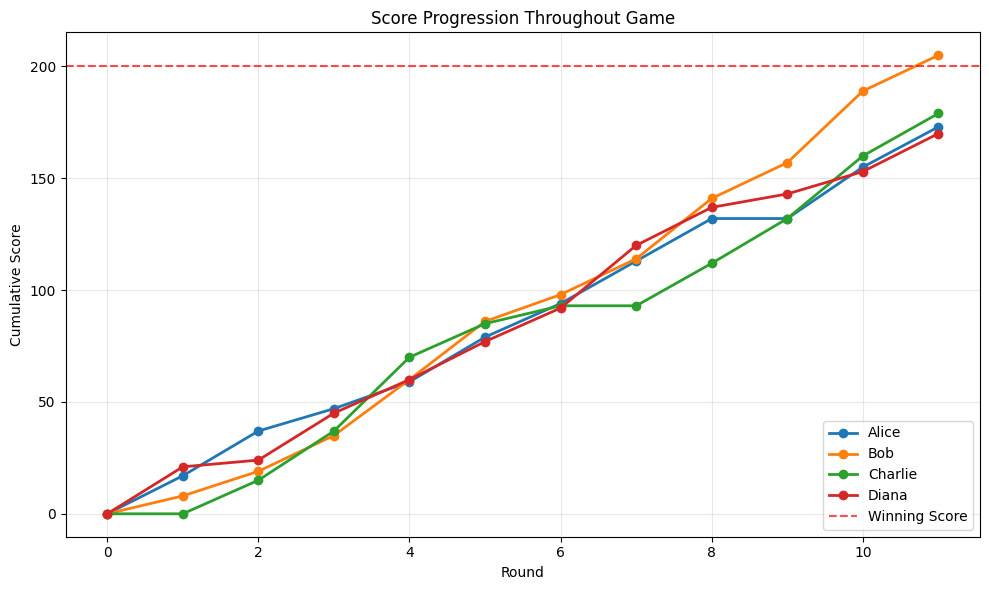

In [7]:
# 1. Score progression over rounds
plt.figure(figsize=(10, 6))
rounds = list(range(len(score_progression[PLAYER_NAMES[0]])))
for player_name in PLAYER_NAMES:
    plt.plot(rounds, score_progression[player_name], marker='o', label=player_name, linewidth=2)

plt.axhline(y=200, color='red', linestyle='--', alpha=0.7, label='Winning Score')
plt.xlabel('Round')
plt.ylabel('Cumulative Score')
plt.title('Score Progression Throughout Game')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

🔍 Corrected Action counts by player (from round data):
  Alice: Stays=10, Busts=1
  Bob: Stays=11, Busts=0
  Charlie: Stays=9, Busts=2
  Diana: Stays=11, Busts=0


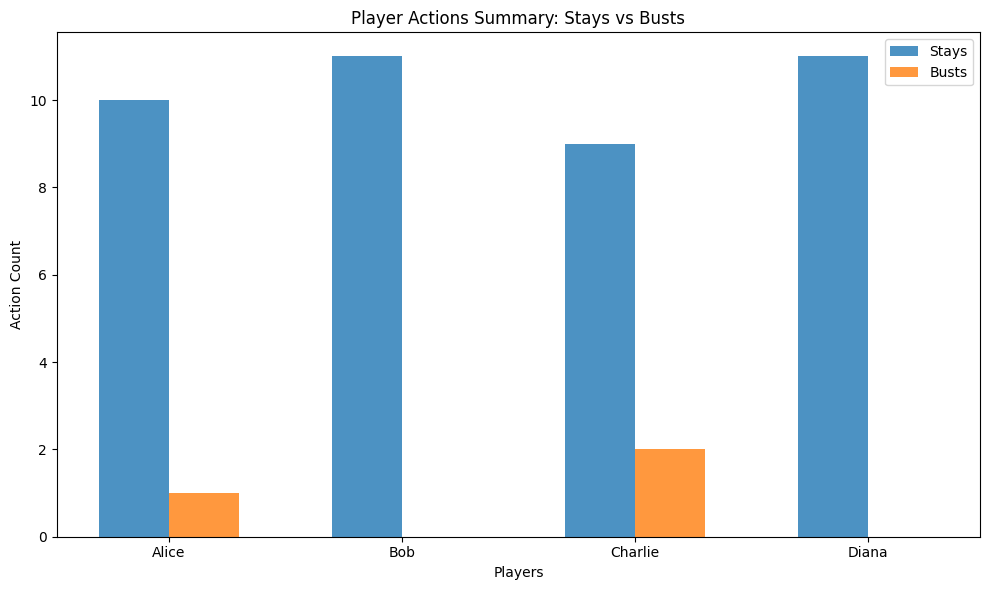

In [8]:
# 2. Player performance metrics
plt.figure(figsize=(10, 6))

# Count stays and busts from round-by-round data instead of action log
player_stats = {name: {'stays': 0, 'busts': 0} for name in PLAYER_NAMES}

# Count from final_hands data in round_end logs
for round_log in round_ends:
    if 'final_hands' in round_log['details']:
        final_hands = round_log['details']['final_hands']
        for player_name in PLAYER_NAMES:
            hand_info = final_hands.get(player_name, {})
            status = hand_info.get('status', 'Unknown')
            
            if status == 'Stayed':
                player_stats[player_name]['stays'] += 1
            elif status == 'Busted':
                player_stats[player_name]['busts'] += 1

print("🔍 Corrected Action counts by player (from round data):")
for player_name in PLAYER_NAMES:
    stats = player_stats[player_name]
    print(f"  {player_name}: Stays={stats['stays']}, Busts={stats['busts']}")

# Create grouped bar chart - only stays and busts
x = range(len(PLAYER_NAMES))
width = 0.3

stays_data = [player_stats[name]['stays'] for name in PLAYER_NAMES]
busts_data = [player_stats[name]['busts'] for name in PLAYER_NAMES]

plt.bar([i - width/2 for i in x], stays_data, width, label='Stays', alpha=0.8)
plt.bar([i + width/2 for i in x], busts_data, width, label='Busts', alpha=0.8)

plt.xlabel('Players')
plt.ylabel('Action Count')
plt.title('Player Actions Summary: Stays vs Busts')
plt.xticks(x, PLAYER_NAMES)
plt.legend()
plt.tight_layout()
plt.show()

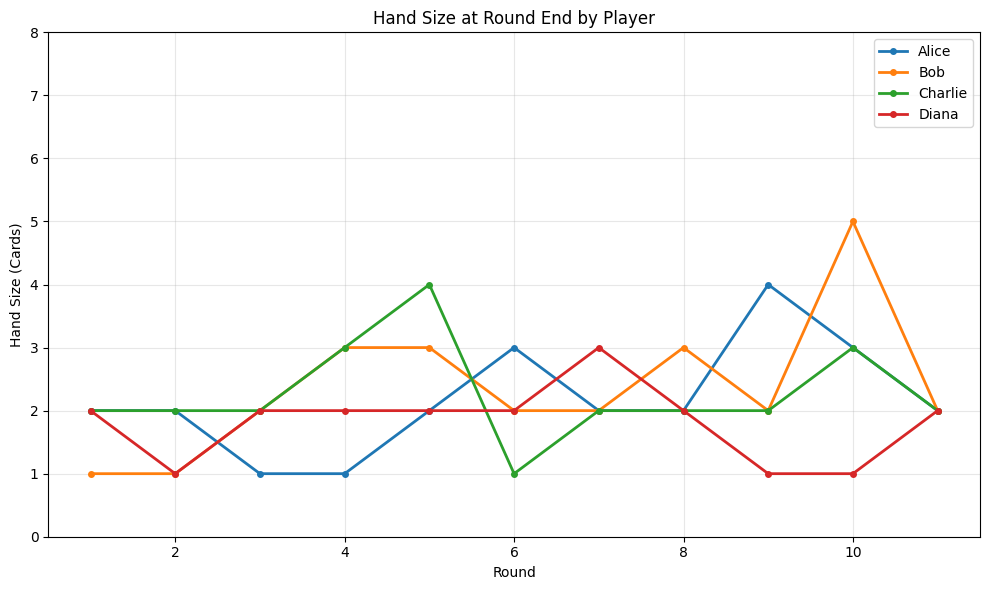


📊 Game Statistics Summary:
🏆 Winner: Bob
🔄 Total Rounds: 11
📝 Total Actions: 190
🎯 Average actions per round: 17.3

📏 Average hand sizes by player:
   Alice: 2.2 cards
   Bob: 2.4 cards
   Charlie: 2.3 cards
   Diana: 1.8 cards


In [9]:
# 3. Hand sizes at round end by player
plt.figure(figsize=(10, 6))

player_hand_sizes = {name: [] for name in PLAYER_NAMES}
round_numbers = []

for round_log in round_ends:
    round_num = round_log['round']
    
    # Check if we have final_hands data
    if 'final_hands' in round_log['details']:
        final_hands = round_log['details']['final_hands']
        round_numbers.append(round_num)
        
        for player_name in PLAYER_NAMES:
            hand_info = final_hands.get(player_name, {})
            hand = hand_info.get('hand', [])
            player_hand_sizes[player_name].append(len(hand))

if round_numbers:  # Only plot if we have data
    for player_name in PLAYER_NAMES:
        plt.plot(round_numbers, player_hand_sizes[player_name], 
                marker='o', label=player_name, linewidth=2, markersize=4)
    
    plt.xlabel('Round')
    plt.ylabel('Hand Size (Cards)')
    plt.title('Hand Size at Round End by Player')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 8)  # Max possible is 7 (Flip 7)
else:
    plt.text(0.5, 0.5, 'No hand data available\n(Run new simulation)', 
             ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
    plt.title('Hand Size at Round End by Player')

plt.tight_layout()
plt.show()

print(f"\n📊 Game Statistics Summary:")
print(f"🏆 Winner: {winner}")
print(f"🔄 Total Rounds: {rounds_played}")
print(f"📝 Total Actions: {len(env.game_log)}")
print(f"🎯 Average actions per round: {len(env.game_log) / rounds_played:.1f}")

if round_numbers:
    print(f"\n📏 Average hand sizes by player:")
    for player_name in PLAYER_NAMES:
        if player_hand_sizes[player_name]:
            avg_size = sum(player_hand_sizes[player_name]) / len(player_hand_sizes[player_name])
            print(f"   {player_name}: {avg_size:.1f} cards")

## 8. Detailed Log Export

Export the complete action log for further analysis or debugging.

In [ ]:
# Show sample of detailed logs
print("📋 Sample of Detailed Action Logs:")
print("=" * 60)

# Show first few actions of each type to understand the logging detail
sample_actions = ['game_start', 'round_start', 'card_dealt', 'player_hit', 'player_stay', 
                 'player_busted', 'round_end']

for action_type in sample_actions:
    logs = env.get_action_log([action_type])
    if logs:
        print(f"\n{action_type.upper()}: (showing first occurrence)")
        print(f"Round {logs[0]['round']}, Action #{logs[0]['action_id']}")
        print(f"Details: {json.dumps(logs[0]['details'], indent=2)}")
        print("-" * 40)

export_flag = False
if not export_flag:
    # Export full log to file
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    log_filename = f"flip7_game_log_{timestamp}.json"

    with open(log_filename, 'w') as f:
        json.dump(env.game_log, f, indent=2)

    print(f"\n💾 Complete game log exported to: {log_filename}")
    print(f"   Total log entries: {len(env.game_log)}")
    print(f"   File size: {os.path.getsize(log_filename)} bytes")

# Show summary statistics
print(f"\n📈 Final Summary:")
print(f"   🎮 Game completed in {rounds_played} rounds")
print(f"   🏆 Winner: {winner}")
print(f"   🎯 Most cautious player: {max(player_stats.items(), key=lambda x: x[1]['stays'])[0]} (most stays)")
print(f"   💥 Most busts: {max(player_stats.items(), key=lambda x: x[1]['busts'])[0]}")

flip_7_events = env.get_action_log(['flip_7_achieved'])
if flip_7_events:
    print(f"   🎉 Flip 7s achieved: {len(flip_7_events)} times")
else:
    print(f"   🎉 No Flip 7s achieved in this game")

📋 Sample of Detailed Action Logs:

GAME_START: (showing first occurrence)
Round 1, Action #1
Details: {
  "players": [
    "Alice",
    "Bob",
    "Charlie",
    "Diana"
  ],
  "winning_score": 200,
  "seed": 42
}
----------------------------------------

ROUND_START: (showing first occurrence)
Round 1, Action #3
Details: {
  "round_number": 1,
  "dealer": "Alice",
  "initial_state": {
    "round_number": 1,
    "dealer": "Alice",
    "players": [
      [
        "Alice",
        0,
        "Active",
        []
      ],
      [
        "Bob",
        0,
        "Active",
        []
      ],
      [
        "Charlie",
        0,
        "Active",
        []
      ],
      [
        "Diana",
        0,
        "Active",
        []
      ]
    ],
    "active_players": 4,
    "game_winner": null,
    "deck_size": 79,
    "discard_pile_size": 0
  }
}
----------------------------------------

CARD_DEALT: (showing first occurrence)
Round 1, Action #4
Details: {
  "player": "Alice",
  "card": 